In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import COLOR_COLUMNS, BAND_CALIB_COLUMNS, BAND_PAIRS, COLOR_PAIRS, process_kids, clean_sdss, describe_column, \
                  cut_u_g, cut_r, number_count_analysis
from utils_plotting import plot_class_histograms

In [3]:
sns.set(style='ticks')

# KIDS magnitudes

In [4]:
kids_x_sdss = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv', sdss_cleaning=True, cut='r')

Data shape: (91317, 44)
Droping NANs: 89513 left
Removing limiting magnitudes: 74196 left
Removing errors bigger than 1: 74191 left
Removing SExtractor flags: 45491 left
Removing ima-flags: 37100 left
Cleaning SDSS: 33880 left
Removing R > 22: 33646 left


In [5]:
catalog = pd.read_csv('catalogs/KiDS_DR3_x_SDSS_DR14_sdss-clean_rf_f-all_cut-r__2018-03-23_15:04:50.csv')
catalog.shape

(2696636, 17)

In [6]:
catalog['train'] = catalog['ID'].isin(kids_x_sdss['ID'])

In [7]:
qso_kids_sdss = kids_x_sdss.loc[kids_x_sdss['CLASS'] == 'QSO']
qso_catalog = catalog.loc[catalog['CLASS'] == 'QSO']

In [8]:
catalog_sampled = catalog.sample(n=500000, random_state=1567)
qso_catalog_sampled = qso_catalog.sample(n=100000, random_state=1567)

In [9]:
catalog_north = catalog.loc[catalog['DECJ2000'] > -15]
catalog_south = catalog.loc[catalog['DECJ2000'] < -15]

In [10]:
describe_column(kids_x_sdss['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([17134,  6093, 10419]),
 array([50.92432979, 18.1091363 , 30.96653391]))

In [11]:
describe_column(catalog['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([1374474,  299603, 1022559]),
 array([50.96994923, 11.11024996, 37.91980082]))

In [12]:
describe_column(catalog_north['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([908135, 191188, 724256]),
 array([49.79959739, 10.48421812, 39.71618449]))

In [13]:
describe_column(catalog_south['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([466339, 108415, 298303]),
 array([53.41449642, 12.41786046, 34.16764312]))

## Standalone bands

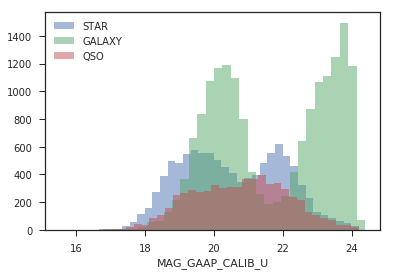

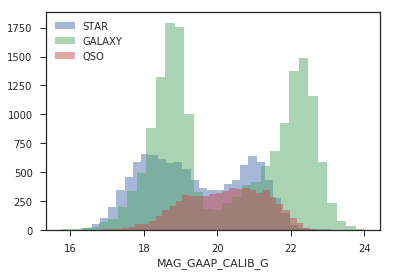

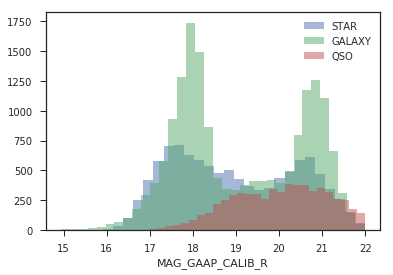

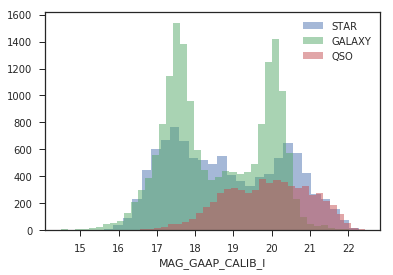

In [13]:
plot_class_histograms(kids_x_sdss, BAND_CALIB_COLUMNS)

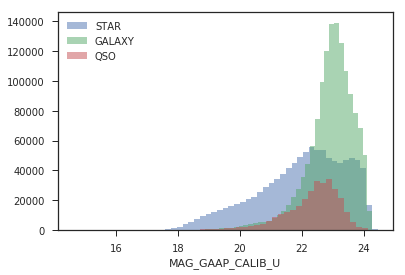

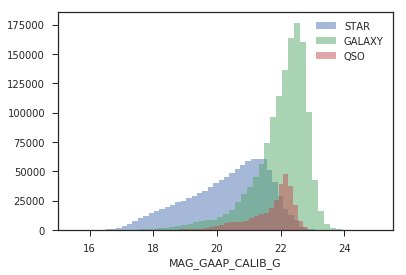

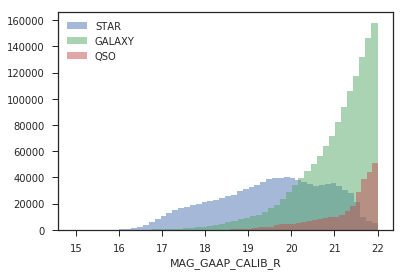

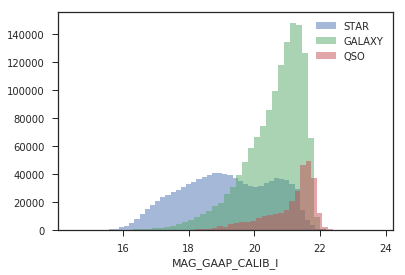

In [14]:
plot_class_histograms(catalog, BAND_CALIB_COLUMNS)

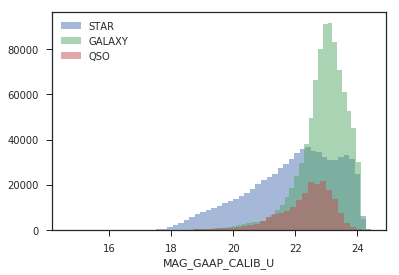

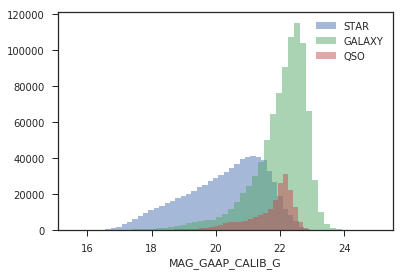

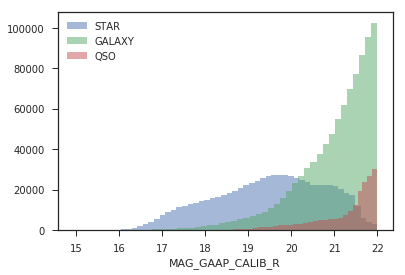

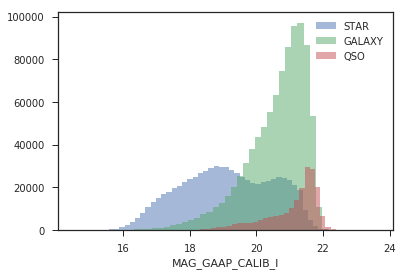

In [15]:
plot_class_histograms(catalog_north, BAND_CALIB_COLUMNS)

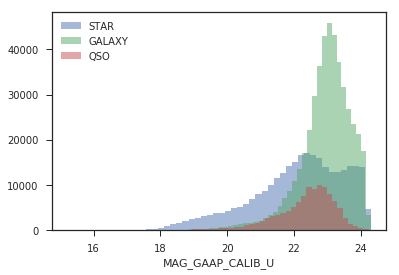

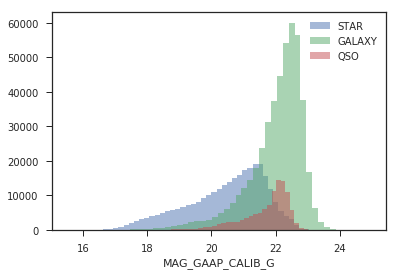

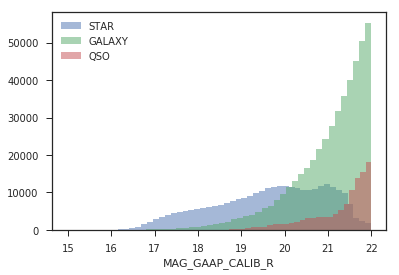

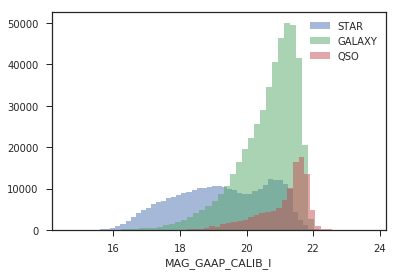

In [16]:
plot_class_histograms(catalog_south, BAND_CALIB_COLUMNS)

## Paired bands

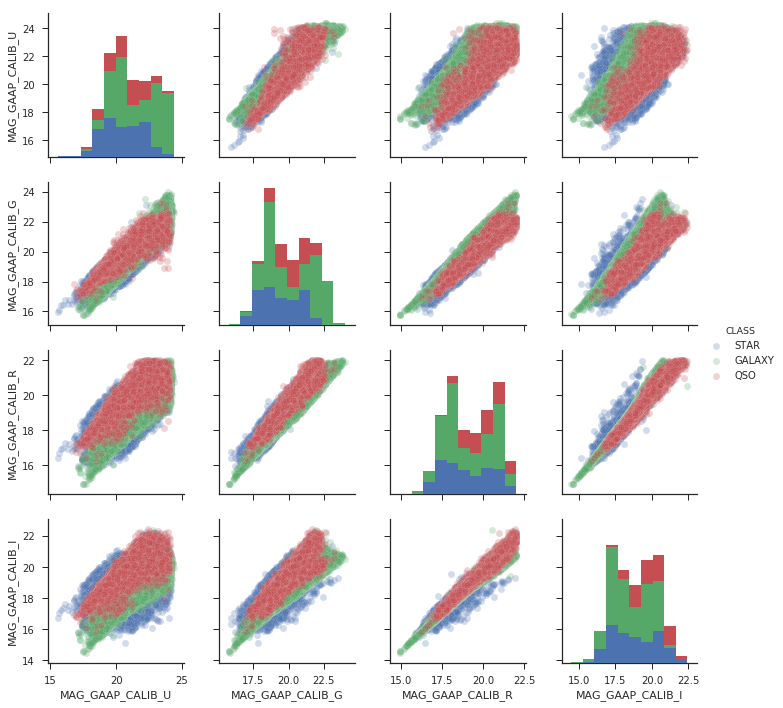

In [17]:
sns.pairplot(kids_x_sdss[np.concatenate([BAND_CALIB_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

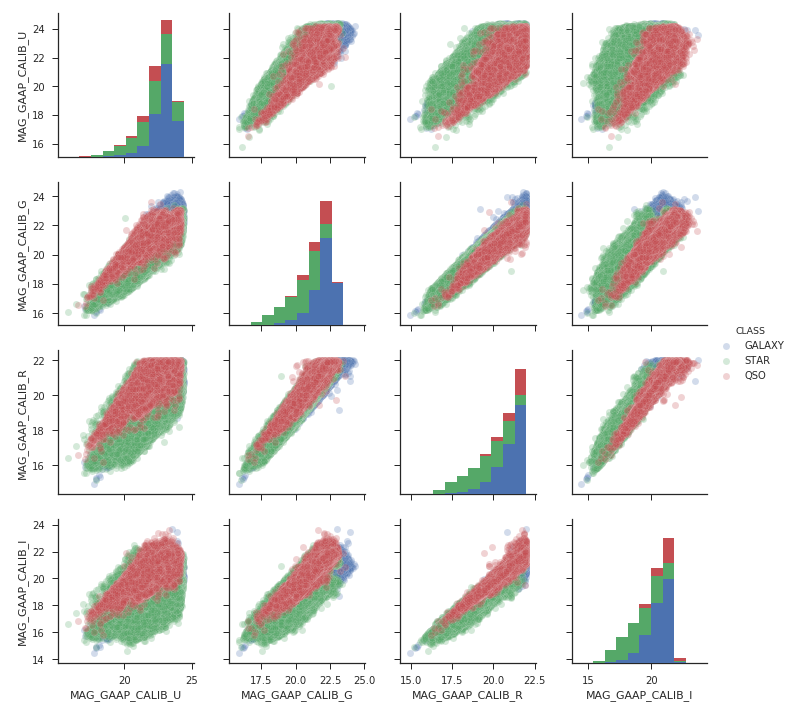

In [19]:
sns.pairplot(catalog_sampled[np.concatenate([BAND_CALIB_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

## Standalone colors

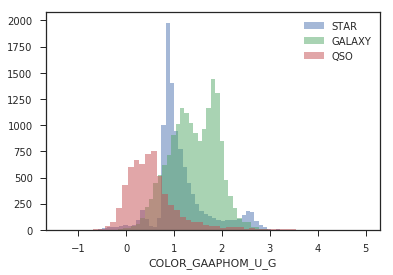

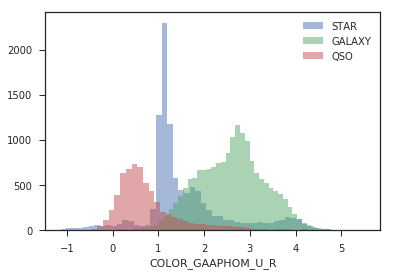

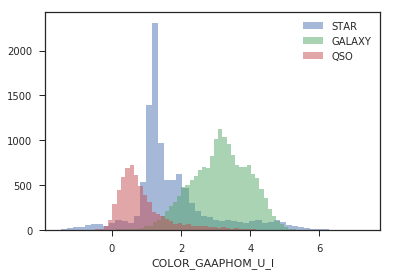

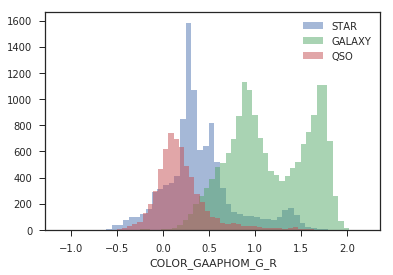

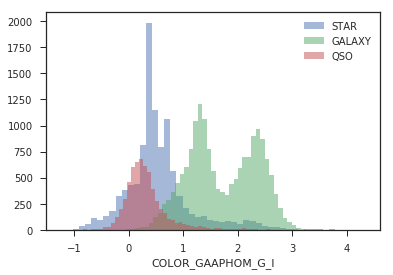

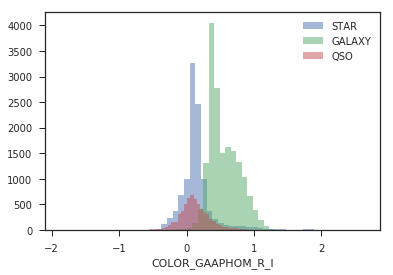

In [20]:
plot_class_histograms(kids_x_sdss, COLOR_COLUMNS)

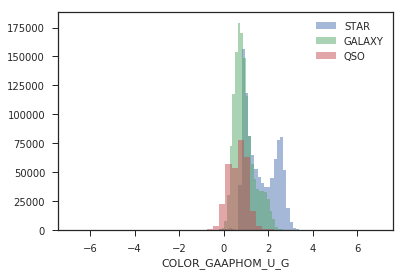

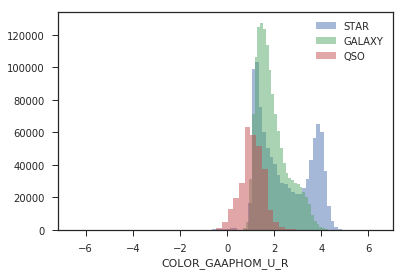

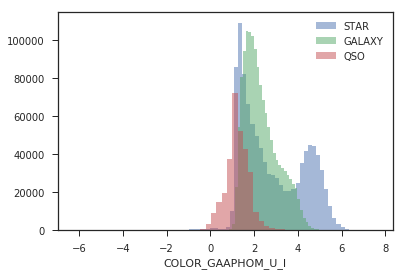

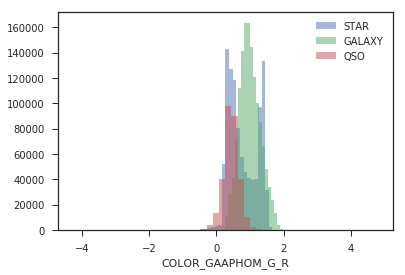

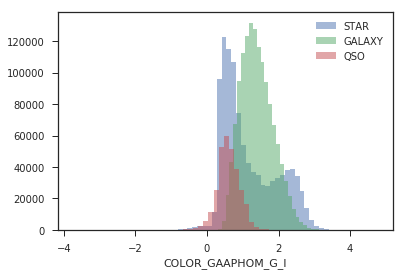

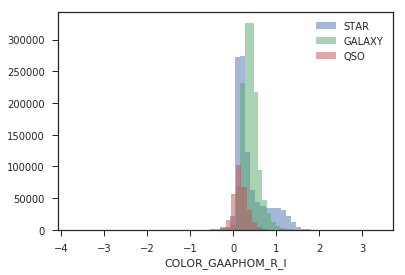

In [22]:
plot_class_histograms(catalog, COLOR_COLUMNS)

## Paired colors

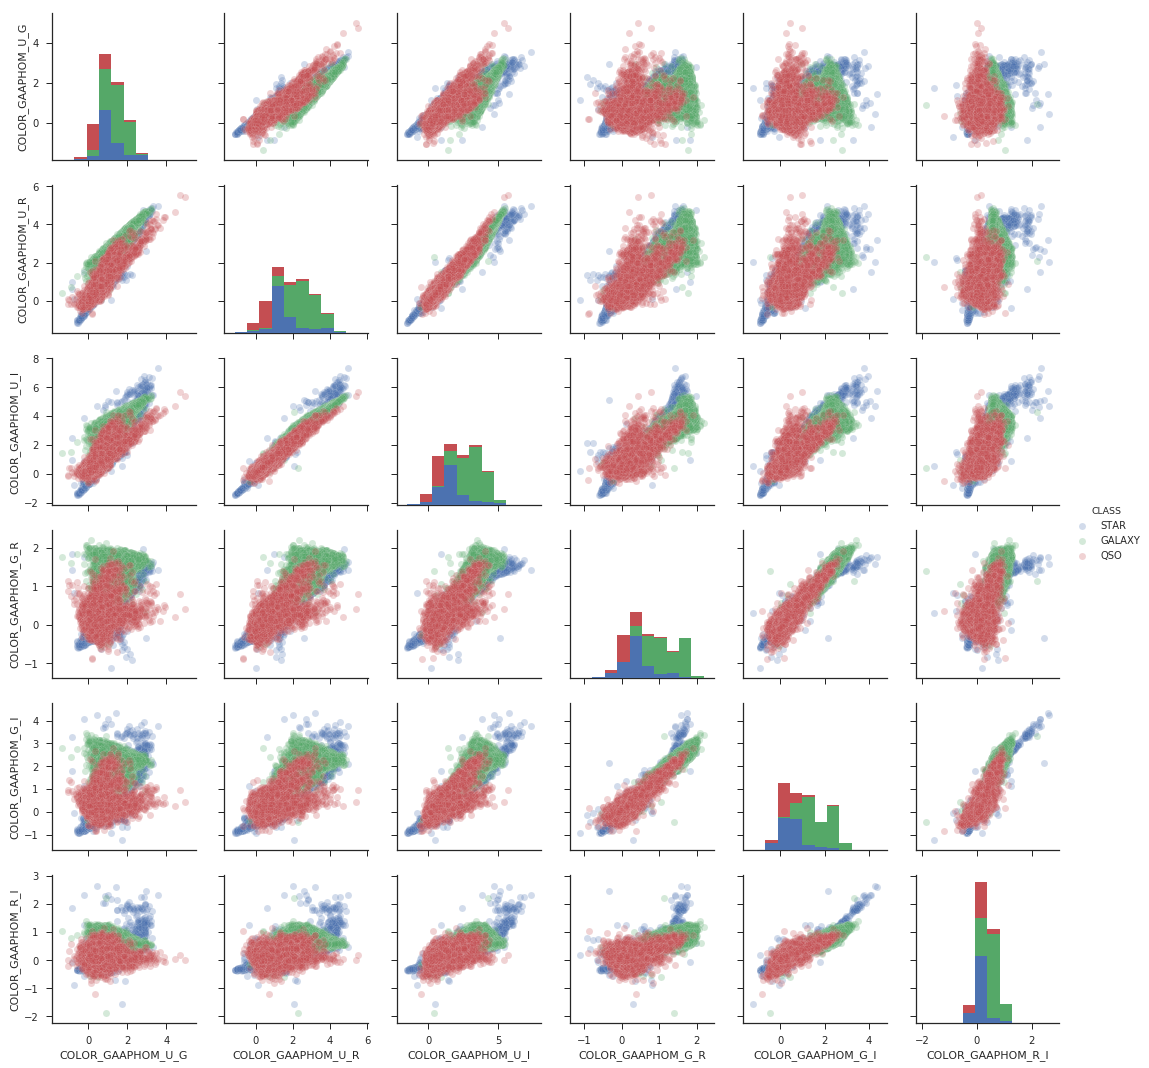

In [23]:
sns.pairplot(kids_x_sdss[np.concatenate([COLOR_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

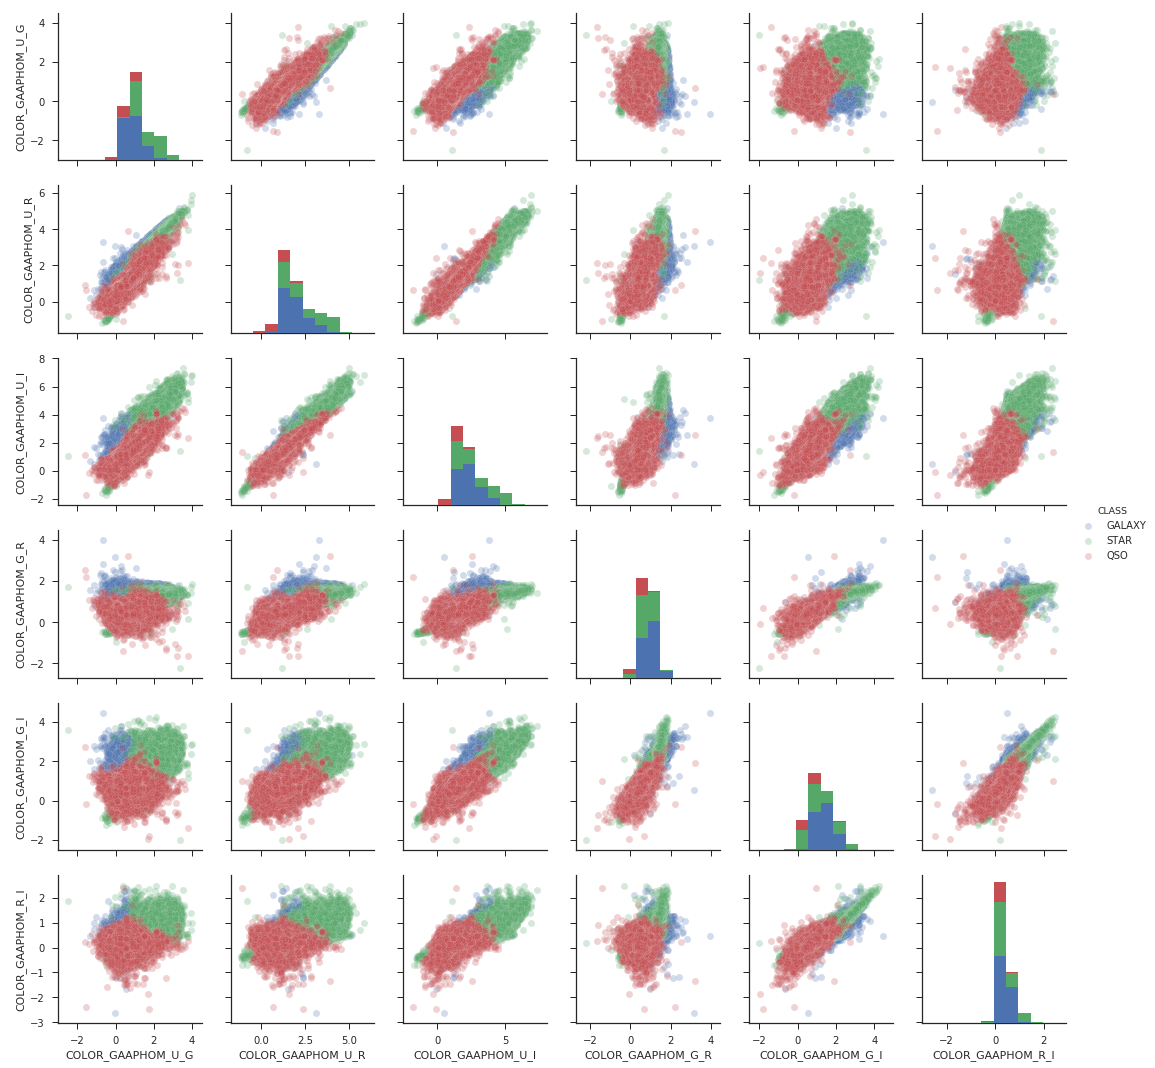

In [25]:
sns.pairplot(catalog_sampled[np.concatenate([COLOR_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

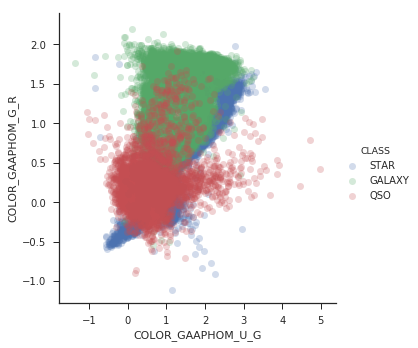

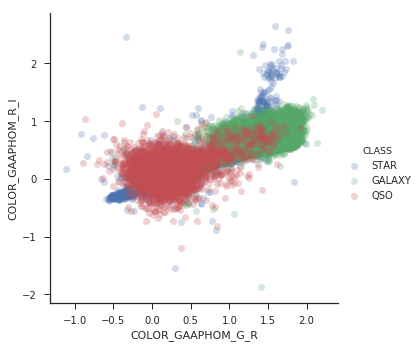

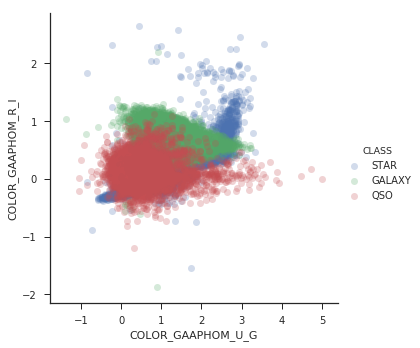

In [26]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=kids_x_sdss, fit_reg=False, scatter_kws={'alpha': 0.25})

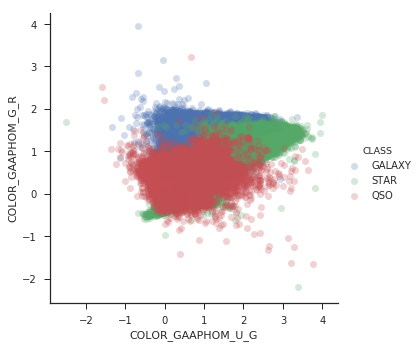

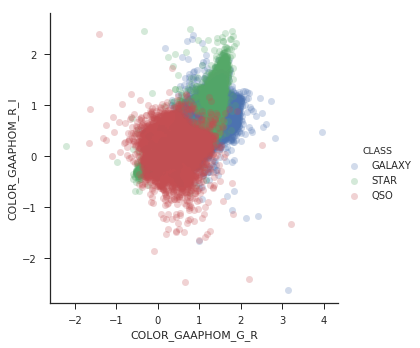

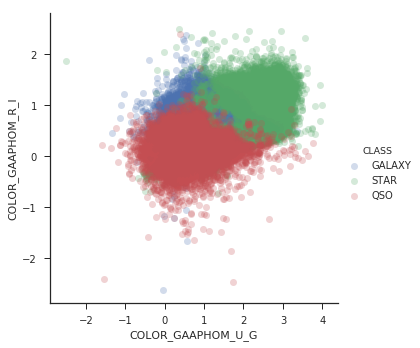

In [27]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=catalog_sampled, fit_reg=False, scatter_kws={'alpha': 0.25})

## QSO color pairs

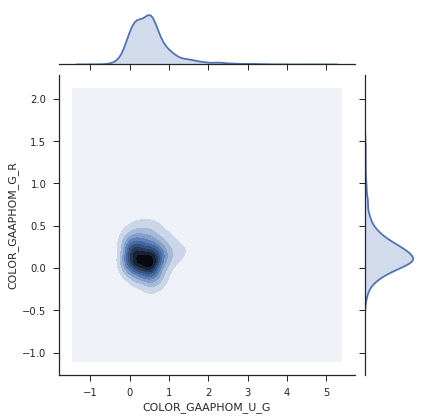

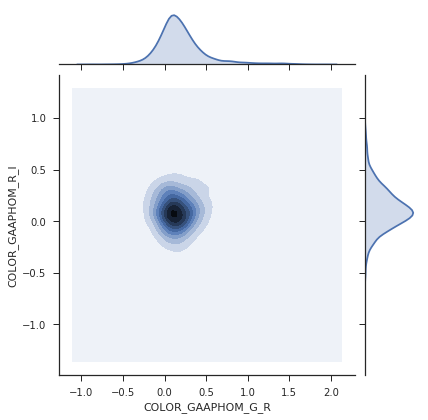

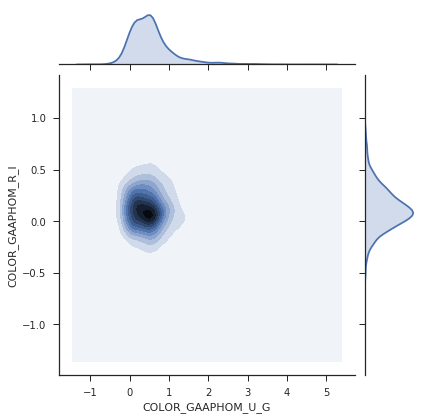

In [28]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.jointplot(qso_kids_sdss[b_1], qso_kids_sdss[b_2], kind='kde', stat_func=None)

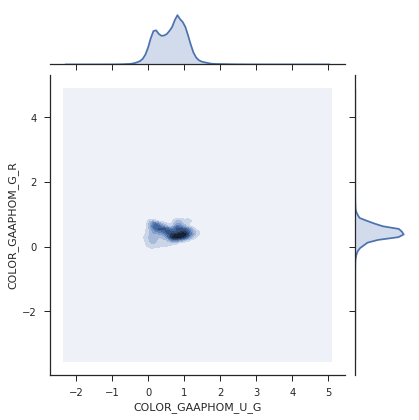

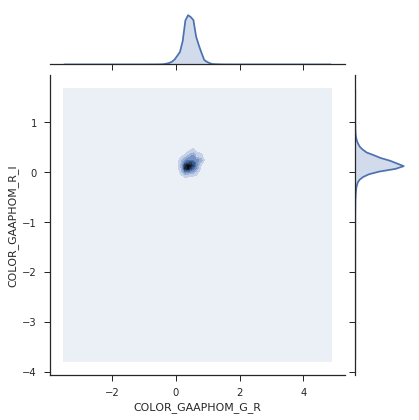

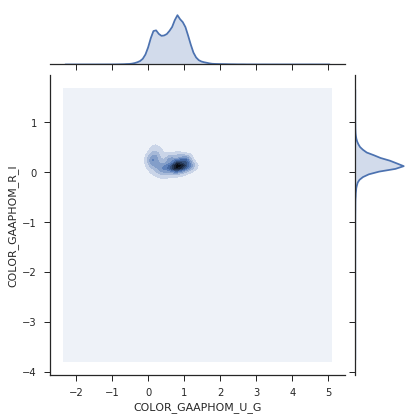

In [30]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.jointplot(qso_catalog_sampled[b_1], qso_catalog_sampled[b_2], kind='kde', stat_func=None)

# Number counts analysis

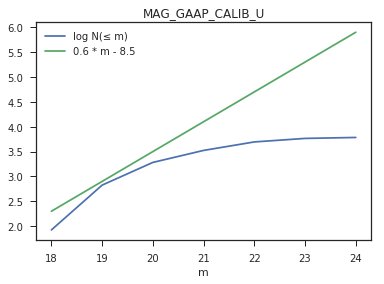

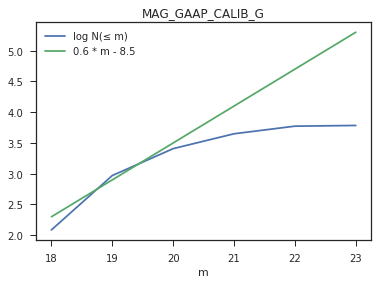

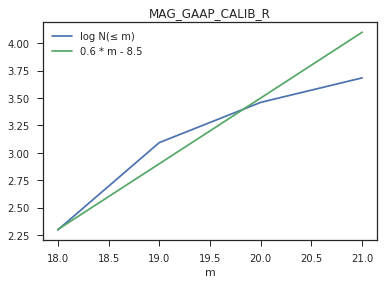

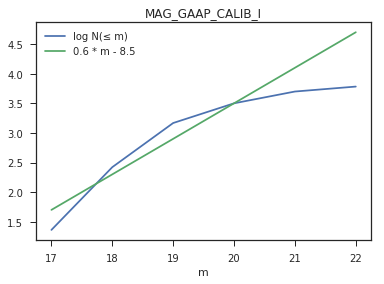

In [31]:
number_count_analysis(qso_kids_sdss, c=8.5)

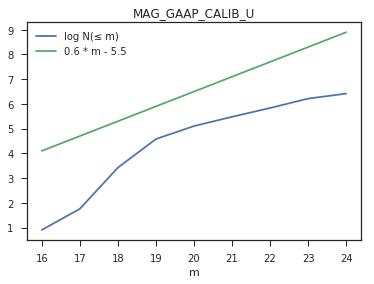

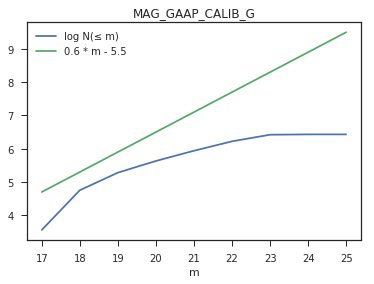

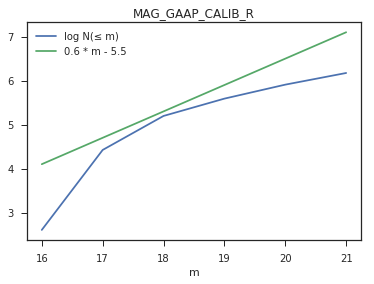

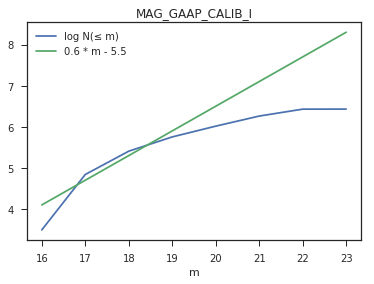

In [32]:
number_count_analysis(catalog, c=5.5)

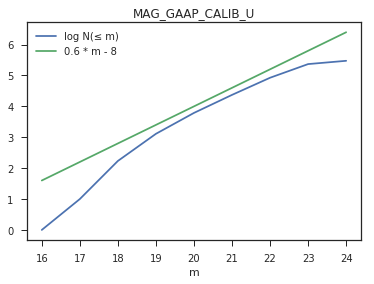

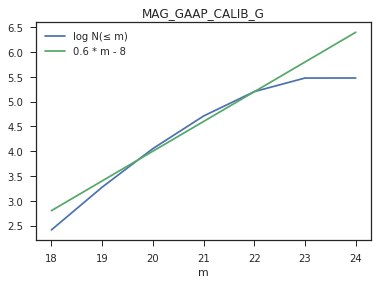

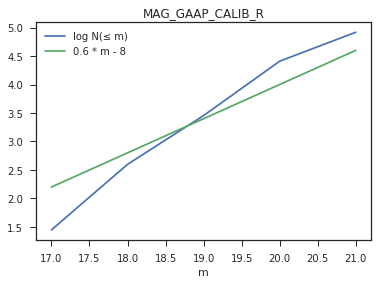

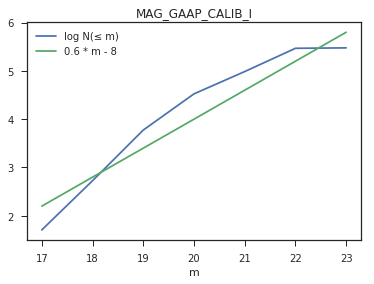

In [33]:
number_count_analysis(qso_catalog, c=8)

# Predictions

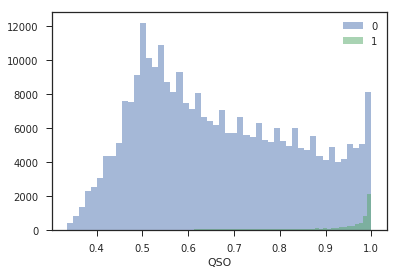

In [21]:
for t in [0, 1]:
    sns.distplot(qso_catalog.loc[qso_catalog['train'] == t]['QSO'], label=str(t), kde=False, rug=False, hist_kws={'alpha': 0.5})
plt.legend()

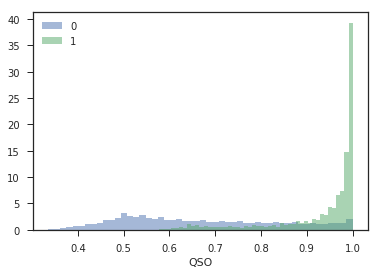

In [22]:
for t in [0, 1]:
    sns.distplot(qso_catalog.loc[qso_catalog['train'] == t]['QSO'], label=str(t), norm_hist=True, kde=False, rug=False, hist_kws={'alpha': 0.5})
plt.legend()